In [115]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [116]:
uber=pd.read_csv('Delivery_11,06-14,07.csv',index_col=0)

In [117]:
uber

,",date",",time_requested",all_distance,distance_to_customer,"delivery_time,","plase_with_order,","customer_address,",cost,"tips,",bonus
№,,,,,,,,,,
1,11.06,17:04,4,0.7,22-57,La-frizzante Pizza and Kebab,Kazimira Pułaskiego 133,"9,69",NaN,NaN
2,11.06,17:30,"4,6","1,8",24-08,McDonald's-Kopernika,Mikoaja Kopernika3,"12,44",NaN,NaN
3,11.06,18:29,"3,4","0,5",16-58,La-frizzante Pizza and Kebab,Zachodnia 30A,"9,16",NaN,NaN
4,11.06,18:51,"6,4","4,4",28-54,McDonald's-Kopernika,"Kleosin, Jana Pawła II 25","19,16",NaN,NaN
5,11.06,20:29,"5,8",1,30-47,Retrospekcja Naleśnikarnia,Wiejska 8,"9,74",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
86,14.07,18:40,"2,8","1,4",17-12,Kolos Kebab,Monte Cassino 3,"12,31",NaN,NaN
87,14.07,19:20,6,"3,8",23-45,McDonald's-Kopernika,Kleosin Mickiewicza 25,"17,66",NaN,NaN
88,14.07,19:49,"5,8","1,9",35-30,McDonald's-Wysyńskiego,Legionowa 9,"13,83",NaN,NaN


In [118]:
uber.columns = uber.columns.astype(str)
uber.columns = uber.columns.str.replace(',', '')

In [119]:
uber['delivery_time'][8]
uber.loc[[8,60], 'delivery_time'] = uber.loc[8, 'delivery_time'].replace(',', ':')

In [120]:
year = 2023
uber['date'] = pd.to_datetime(uber['date'].astype(str) + '.' + str(year), format='%d.%m.%Y', errors='coerce')

uber['delivery_time'] = uber['delivery_time'].str.replace('-', ':')
uber[['minutes', 'seconds']] = uber['delivery_time'].str.split(':', expand=True)
uber['minutes'] = pd.to_numeric(uber['minutes'])
uber['seconds'] = pd.to_numeric(uber['seconds'])
uber['total_seconds'] = uber['minutes'] * 60 + uber['seconds']

In [121]:
uber['minutes'] * 60 + uber['seconds']

№
1     1377.0
2     1448.0
3     1018.0
4     1734.0
5     1847.0
       ...  
86    1032.0
87    1425.0
88    2130.0
89    1289.0
90     974.0
Length: 89, dtype: float64

In [122]:
uber['time_requested']=pd.to_datetime(uber['time_requested'], format='%H:%M').dt.time

In [123]:
def get_week_date_range(date):
    start_of_week = date - timedelta(days=date.weekday())
    end_of_week = start_of_week + timedelta(days=6)
    return f"{start_of_week:%m-%d} to {end_of_week:%m-%d}"
uber['week_date_range'] = uber['date'].apply(get_week_date_range)

In [124]:
uber['week_date_range']
uber

,date,time_requested,all_distance,distance_to_customer,delivery_time,plase_with_order,customer_address,cost,tips,bonus,minutes,seconds,total_seconds,week_date_range
№,,,,,,,,,,,,,,
1,2023-06-11,17:04:00,4,0.7,22:57,La-frizzante Pizza and Kebab,Kazimira Pułaskiego 133,"9,69",NaN,NaN,22,57.0,1377.0,06-05 to 06-11
2,2023-06-11,17:30:00,"4,6","1,8",24:08,McDonald's-Kopernika,Mikoaja Kopernika3,"12,44",NaN,NaN,24,8.0,1448.0,06-05 to 06-11
3,2023-06-11,18:29:00,"3,4","0,5",16:58,La-frizzante Pizza and Kebab,Zachodnia 30A,"9,16",NaN,NaN,16,58.0,1018.0,06-05 to 06-11
4,2023-06-11,18:51:00,"6,4","4,4",28:54,McDonald's-Kopernika,"Kleosin, Jana Pawła II 25","19,16",NaN,NaN,28,54.0,1734.0,06-05 to 06-11
5,2023-06-11,20:29:00,"5,8",1,30:47,Retrospekcja Naleśnikarnia,Wiejska 8,"9,74",NaN,NaN,30,47.0,1847.0,06-05 to 06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,2023-07-14,18:40:00,"2,8","1,4",17:12,Kolos Kebab,Monte Cassino 3,"12,31",NaN,NaN,17,12.0,1032.0,07-10 to 07-16
87,2023-07-14,19:20:00,6,"3,8",23:45,McDonald's-Kopernika,Kleosin Mickiewicza 25,"17,66",NaN,NaN,23,45.0,1425.0,07-10 to 07-16
88,2023-07-14,19:49:00,"5,8","1,9",35:30,McDonald's-Wysyńskiego,Legionowa 9,"13,83",NaN,NaN,35,30.0,2130.0,07-10 to 07-16


In [125]:
uber[['all_distance','distance_to_customer']]=uber[['all_distance','distance_to_customer']].applymap(lambda x: x.replace(',', '.'))


In [131]:
uber['cost'] = uber['cost'].astype(str).str.replace(',', '.')
uber['cost'] = uber['cost'].astype(float)

In [132]:
uber[['all_distance','distance_to_customer']]=uber[['all_distance','distance_to_customer']].astype(float)

In [133]:
grouped_data = uber.groupby(['date'])
sec_all_dist_for_day = grouped_data[['all_distance','total_seconds','cost']].sum()

In [134]:
sec_all_dist_for_day

,all_distance,total_seconds,cost
date,,,
2023-06-11,42.6,14975.0,115.54
2023-06-12,17.3,6030.0,34.60
2023-06-21,10.5,3991.0,44.59
2023-06-22,26.7,8870.0,90.67
2023-06-23,66.5,14801.0,158.51
2023-06-24,14.1,6023.0,84.11
2023-06-25,21.6,7991.0,96.31
2023-06-28,23.1,9714.0,75.17
2023-06-29,16.0,6135.0,75.36


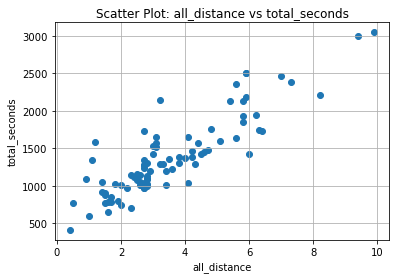

In [136]:
plt.scatter(uber['all_distance'], uber['total_seconds'])


plt.xlabel('all_distance')
plt.ylabel('total_seconds')
plt.title('Scatter Plot: all_distance vs total_seconds')
plt.grid(True)

In [139]:
cost_value_counts = uber['cost'].describe()
print(cost_value_counts)

count    89.000000
mean     13.877865
std       5.109474
min       2.900000
25%      10.770000
50%      12.480000
75%      15.020000
max      41.160000
Name: cost, dtype: float64


In [146]:
median_cost = uber['cost'].median()
median_cost
mean_cost = uber['cost'].mean()
mean_cost,median_cost

(13.877865168539326, 12.48)

In [150]:
print(f"Mean_cost: {mean_cost:.2f} PLN")
print(f"Median_cost: {median_cost:.2f} PLN")

Mean_cost: 13.88 PLN
Median_cost: 12.48 PLN


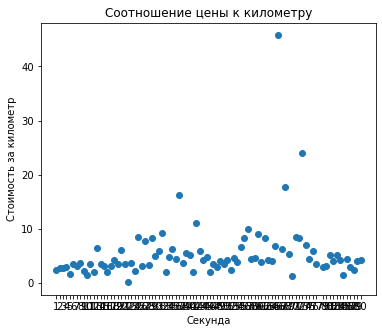

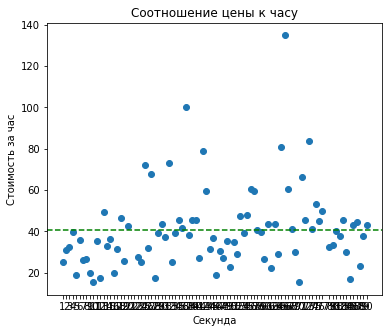

In [169]:
uber['cost_per_km'] = uber['cost'] / uber['all_distance']
uber['cost_per_hour'] = uber['cost'] / uber['total_seconds'] * 3600

plt.figure(figsize=(6, 5))
plt.scatter(uber.index, uber['cost_per_km'])
plt.xlabel('Секунда')
plt.ylabel('Стоимость за километр')
plt.title('Соотношение цены к километру')
plt.xticks(uber.index)
plt.show()

# Создаем точечный график для соотношения цены к часу
plt.figure(figsize=(6, 5))
plt.scatter(uber.index, uber['cost_per_hour'])
plt.xlabel('Секунда')
plt.ylabel('Стоимость за час')
plt.axhline(y=uber['cost_per_hour'].mean(), color='green', linestyle='dashed', label='Среднее значение стоимости за час')
plt.title('Соотношение цены к часу')
plt.xticks(uber.index)
plt.show()

In [168]:
mean_cost =uber['cost_per_hour'].mean()
mean_cost
print(f"Mean_cost: {mean_cost:.2f} PLN")

Mean_cost: 40.66 PLN
